In [2]:
import pickle
import multirecording_spikeanalysis as spike
import pandas as pd
import numpy as np

In [2]:
reward_ephys = spike.EphysRecordingCollection(r'.\export\both_reward')
# Exclude d3_subj_1-1 because missing dictionary. Make dictionary and include in future analysis
# Some of the recordings have unsorted units with thousands of spikes. Complete spike sorting in future analysis

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Unit 92 is unsorted & has 2494 spikes
Unit 92 will be deleted
20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-1_t1b3L_box1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Unit 103 is unsorted & has 512 spikes
Unit 103 will be deleted
20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-2_t3b3L_box1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230624_105855_standard_comp_to_both_rewarded_D3_subj_1-4_t3b3L_box1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230625_112913_standard_comp_to_both_rewarded_D4_subj_1-1_t1b2L_box1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Unit 96 is unsorted & has 5811 spikes
Unit 96 will be deleted
Unit 95 is unsorted & has 6458 spikes
Unit 95 will be deleted
20230625_112913_standard_comp_to_both_rewarded_D4_subj_1-4_t3b3L_box1_merged.rec
Please assign event dictionaries to each recording
as recording.event_dict
event_dict = {event name(str): 

In [3]:
label_timestamps = pickle.load(open('recording_to_label_to_timestamps 1.pkl', 'rb'))

In [4]:
for recording in reward_ephys.collection.keys():
    # Check if the recording key (without the .rec suffix) is in label_timestamps
    recording_key_without_suffix = recording[:-4]  # Remove '.rec' from the end
    if recording_key_without_suffix in label_timestamps:
        # Assign the corresponding label_timestamps dictionary to event_dict
        reward_ephys.collection[recording].event_dict = label_timestamps[recording_key_without_suffix]
        
        # Extract the subject from the recording key
        # Find the positions of 'subj_' and '_t' to extract the subject
        start = recording.find('subj_') + 5  # Start index after 'subj_'
        end = recording.find('_t', start)  # End index before '_t'
        subject = recording[start:end].replace('-', '_')  # Replace '-' with '_'
        
        # Assign the extracted subject
        reward_ephys.collection[recording].subject = subject

In [5]:
reward_spike_analysis = spike.SpikeAnalysis_MultiRecording(reward_ephys)

Your event dictionary keys are different across recordings.
Please double check them:
20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-1_t1b3L_box1_merged.rec keys: dict_keys(['both_rewarded', 'lose'])
20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-2_t3b3L_box1_merged.rec keys: dict_keys(['both_rewarded', 'win'])
20230624_105855_standard_comp_to_both_rewarded_D3_subj_1-4_t3b3L_box1_merged.rec keys: dict_keys(['both_rewarded', 'lose'])
20230625_112913_standard_comp_to_both_rewarded_D4_subj_1-1_t1b2L_box1_merged.rec keys: dict_keys(['both_rewarded', 'lose', 'win'])
20230625_112913_standard_comp_to_both_rewarded_D4_subj_1-4_t3b3L_box1_merged.rec keys: dict_keys(['both_rewarded', 'lose', 'win'])
All set to analyze


In [6]:
reward_spike_analysis.wilcox_baseline_v_event_collection('win', 10, 10)

KeyError: 'win'

In [7]:
reward_ephys_wins = spike.EphysRecordingCollection(r'.\export\reward_wins')
# Only using recordings with wins

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Unit 103 is unsorted & has 512 spikes
Unit 103 will be deleted
20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-2_t3b3L_box1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230625_112913_standard_comp_to_both_rewarded_D4_subj_1-1_t1b2L_box1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Unit 96 is unsorted & has 5811 spikes
Unit 96 will be deleted
Unit 95 is unsorted & has 6458 spikes
Unit 95 will be deleted
20230625_112913_standard_comp_to_both_rewarded_D4_subj_1-4_t3b3L_box1_merged.rec
Please assign event dictionaries to each recording
as recording.event_dict
event_dict = {event name(str): np.array[[start(ms), stop(ms)]...]
Please assign subjects to each recording as recording.subject


In [8]:
for recording in reward_ephys_wins.collection.keys():
    # Check if the recording key (without the .rec suffix) is in label_timestamps
    recording_key_without_suffix = recording[:-4]  # Remove '.rec' from the end
    if recording_key_without_suffix in label_timestamps:
        # Assign the corresponding label_timestamps dictionary to event_dict
        reward_ephys_wins.collection[recording].event_dict = label_timestamps[recording_key_without_suffix]
        
        # Extract the subject from the recording key
        # Find the positions of 'subj_' and '_t' to extract the subject
        start = recording.find('subj_') + 5  # Start index after 'subj_'
        end = recording.find('_t', start)  # End index before '_t'
        subject = recording[start:end].replace('-', '_')  # Replace '-' with '_'
        
        # Assign the extracted subject
        reward_ephys_wins.collection[recording].subject = subject

In [9]:
reward_wins_spike_analysis = spike.SpikeAnalysis_MultiRecording(reward_ephys_wins)

Your event dictionary keys are different across recordings.
Please double check them:
20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-2_t3b3L_box1_merged.rec keys: dict_keys(['both_rewarded', 'win'])
20230625_112913_standard_comp_to_both_rewarded_D4_subj_1-1_t1b2L_box1_merged.rec keys: dict_keys(['both_rewarded', 'lose', 'win'])
20230625_112913_standard_comp_to_both_rewarded_D4_subj_1-4_t3b3L_box1_merged.rec keys: dict_keys(['both_rewarded', 'lose', 'win'])
All set to analyze


C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


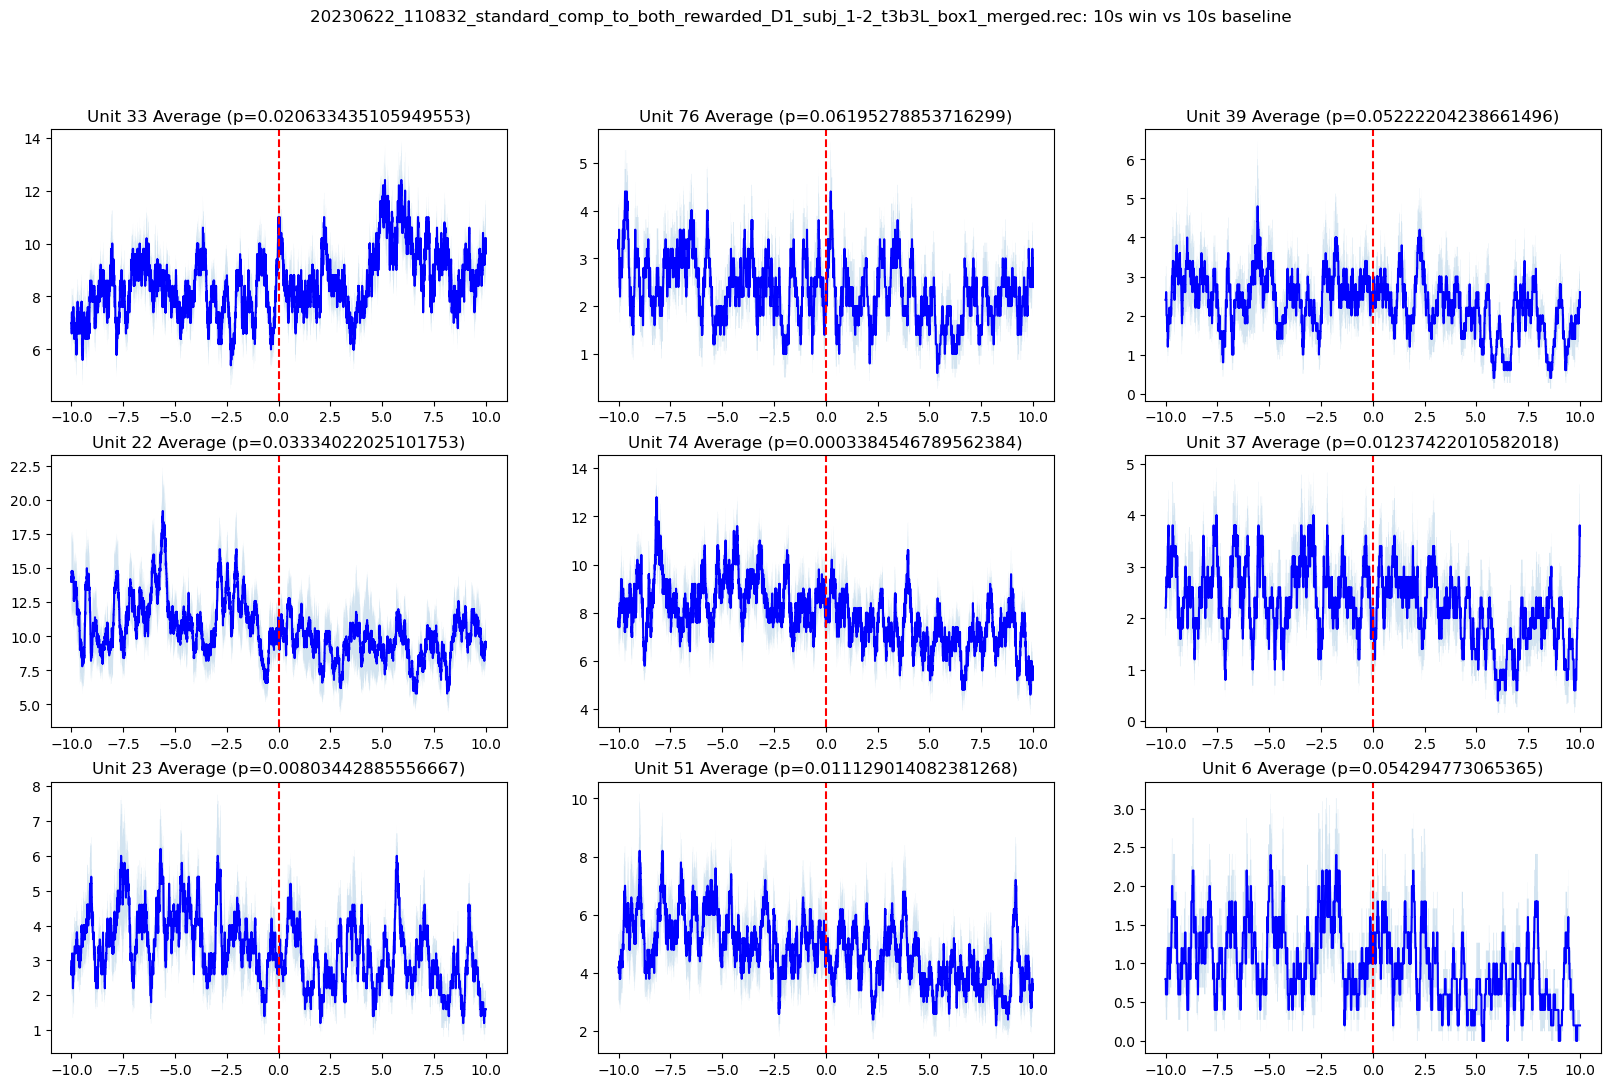

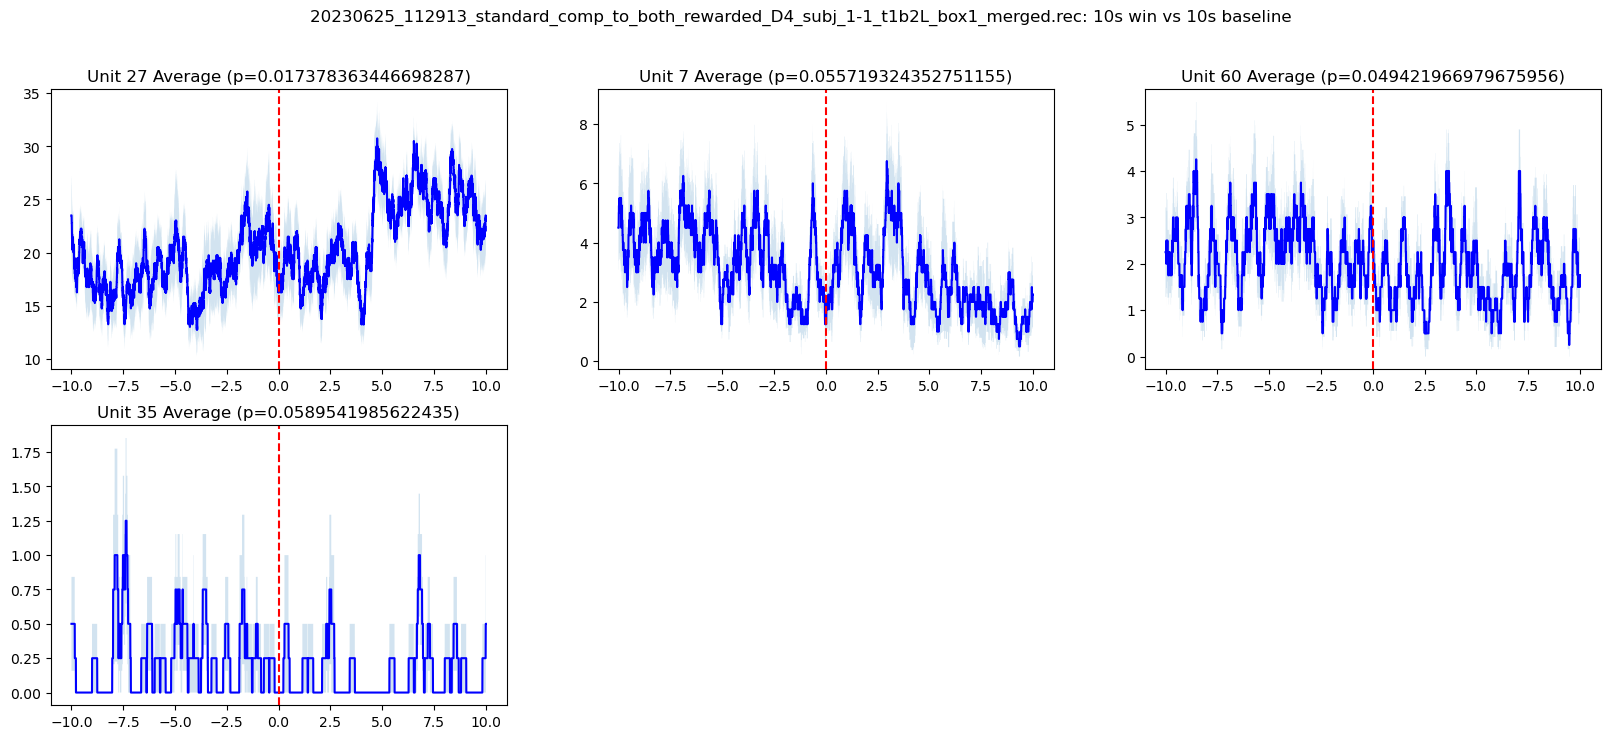

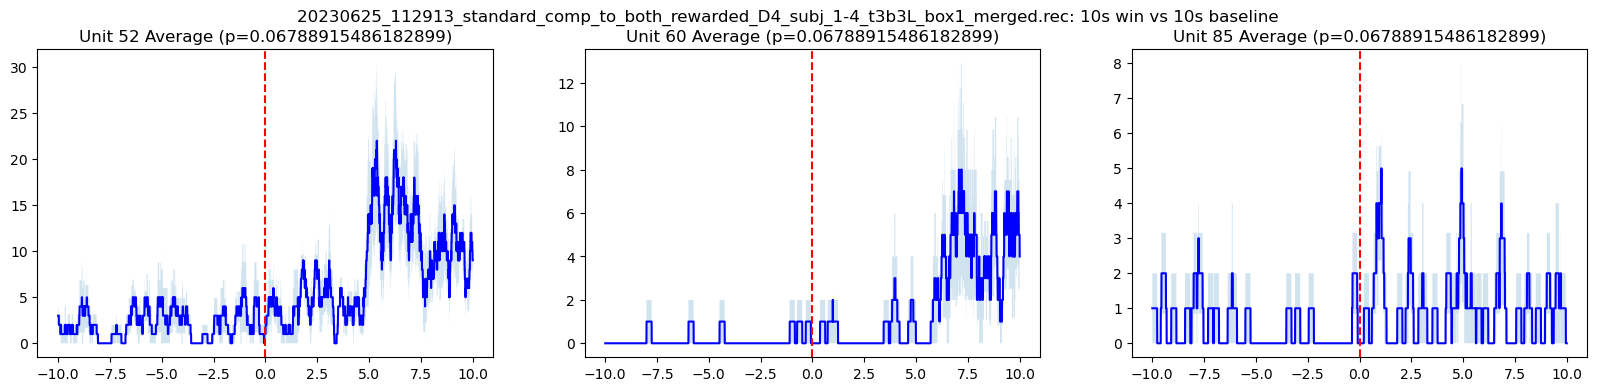

,original unit id,Wilcoxon Stat,p value,event1 vs event2,Recording,Subject,Event
0,21,86.0,0.478125,not significant,20230622_110832_standard_comp_to_both_rewarded...,1_2,10s win vs 10s baseline
1,28,52.5,0.254908,not significant,20230622_110832_standard_comp_to_both_rewarded...,1_2,10s win vs 10s baseline
2,53,87.5,0.513182,not significant,20230622_110832_standard_comp_to_both_rewarded...,1_2,10s win vs 10s baseline
3,46,64.0,0.125859,not significant,20230622_110832_standard_comp_to_both_rewarded...,1_2,10s win vs 10s baseline
4,45,62.0,0.108427,not significant,20230622_110832_standard_comp_to_both_rewarded...,1_2,10s win vs 10s baseline
...,...,...,...,...,...,...,...
59,39,3.0,0.465209,not significant,20230625_112913_standard_comp_to_both_rewarded...,1_4,10s win vs 10s baseline
60,17,1.5,0.197466,not significant,20230625_112913_standard_comp_to_both_rewarded...,1_4,10s win vs 10s baseline
61,15,5.0,1.000000,not significant,20230625_112913_standard_comp_to_both_rewarded...,1_4,10s win vs 10s baseline
62,27,5.0,1.000000,not significant,20230625_112913_standard_comp_to_both_rewarded...,1_4,10s win vs 10s baseline


In [10]:
reward_wins_spike_analysis.wilcox_baseline_v_event_collection('win', 10, 10)

In [12]:
keyslist = []

In [15]:
for current_dict in label_timestamps:
    for key in current_dict:
        keyslist.append(key)

In [14]:
label_timestamps.keys()

dict_keys(['20230612_112630_standard_comp_to_training_D1_subj_1-1_t1b3L_box2_merged', '20230612_112630_standard_comp_to_training_D1_subj_1-2_t2b2L_box1_merged', '20230613_105657_standard_comp_to_training_D2_subj_1-1_t1b2L_box1_merged', '20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged', '20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_box1_merged', '20230614_114041_standard_comp_to_training_D3_subj_1-2_t2b2L_box2_merged', '20230616_111904_standard_comp_to_training_D4_subj_1-2_t2b2L_box2_merged', '20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged', '20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged', '20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged', '20230618_100636_standard_comp_to_omission_D2_subj_1_1_t1b2L_box2_merged', '20230618_100636_standard_comp_to_omission_D2_subj_1_4_t4b3L_box1_merged', '20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged', '20230620_114

In [17]:
keyslist = []
for recording, current_dict in label_timestamps.items():
    for key in current_dict:
        keyslist.append(key)

In [19]:
keyslist = set(keyslist)

In [21]:
keyslist

{'both_rewarded', 'lose', 'omission', 'rewarded', 'win'}

In [22]:
testarray = np.array([[0,0]])

In [24]:
testarray

array([[0, 0]])

In [25]:
label_timestamps['20230625_112913_standard_comp_to_both_rewarded_D4_subj_1-4_t3b3L_box1_merged']['win'].shape

(4, 2)

In [27]:
for recording, current_dict in label_timestamps.items():
    for key in keyslist:
        current_dict[key] = current_dict.get(key, np.array([[0,0]]))

In [29]:
pickle.dump(label_timestamps, open('label_timestamps.pkl', 'wb'))

In [30]:
reward_ephys = spike.EphysRecordingCollection(r'.\export\both_reward')
# Exclude d3_subj_1-1 because missing dictionary. Make dictionary and include in future analysis
# Some of the recordings have unsorted units with thousands of spikes. Complete spike sorting in future analysis

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Unit 92 is unsorted & has 2494 spikes
Unit 92 will be deleted
20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-1_t1b3L_box1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Unit 103 is unsorted & has 512 spikes
Unit 103 will be deleted
20230622_110832_standard_comp_to_both_rewarded_D1_subj_1-2_t3b3L_box1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230624_105855_standard_comp_to_both_rewarded_D3_subj_1-4_t3b3L_box1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230625_112913_standard_comp_to_both_rewarded_D4_subj_1-1_t1b2L_box1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Unit 96 is unsorted & has 5811 spikes
Unit 96 will be deleted
Unit 95 is unsorted & has 6458 spikes
Unit 95 will be deleted
20230625_112913_standard_comp_to_both_rewarded_D4_subj_1-4_t3b3L_box1_merged.rec
Please assign event dictionaries to each recording
as recording.event_dict
event_dict = {event name(str): 

In [31]:
for recording in reward_ephys.collection.keys():
    # Check if the recording key (without the .rec suffix) is in label_timestamps
    recording_key_without_suffix = recording[:-4]  # Remove '.rec' from the end
    if recording_key_without_suffix in label_timestamps:
        # Assign the corresponding label_timestamps dictionary to event_dict
        reward_ephys.collection[recording].event_dict = label_timestamps[recording_key_without_suffix]
        
        # Extract the subject from the recording key
        # Find the positions of 'subj_' and '_t' to extract the subject
        start = recording.find('subj_') + 5  # Start index after 'subj_'
        end = recording.find('_t', start)  # End index before '_t'
        subject = recording[start:end].replace('-', '_')  # Replace '-' with '_'
        
        # Assign the extracted subject
        reward_ephys.collection[recording].subject = subject

In [32]:
reward_spike_analysis = spike.SpikeAnalysis_MultiRecording(reward_ephys)

All set to analyze


MemoryError: Unable to allocate 27.5 MiB for an array with shape (3602642,) and data type int64

In [3]:
label_timestamps = pickle.load(open('recording_to_label_to_timestamps 1.pkl', 'rb'))

In [5]:
for key in label_timestamps:
    print (key.keys())

AttributeError: 'str' object has no attribute 'keys'

In [6]:
label_timestamps

{'20230612_112630_standard_comp_to_training_D1_subj_1-1_t1b3L_box2_merged': {'lose': array([[ 176337,  186337],
         [ 291337,  301336],
         [ 381336,  391336],
         [ 436336,  446336],
         [ 486336,  496336],
         [ 581336,  591336],
         [ 656336,  666336],
         [ 761336,  771336],
         [ 811336,  821336],
         [ 891336,  901336],
         [ 956336,  966336],
         [1021336, 1031336],
         [1071336, 1081336]], dtype=int64),
  'rewarded': array([[1856335, 1866335],
         [1916335, 1926335],
         [1971335, 1981335],
         [2036335, 2046335],
         [2091334, 2101334],
         [2141334, 2151334],
         [2191334, 2201334],
         [2296334, 2306334],
         [2416334, 2426334],
         [2536334, 2546334],
         [2646334, 2656334],
         [2731334, 2741334],
         [2851334, 2861334],
         [2911334, 2921334],
         [2976334, 2986333],
         [3036333, 3046333],
         [3111333, 3121333],
         [3211333, 3

In [8]:
for main_key in label_timestamps.keys():
    print(f"Main Key: {main_key}")
    for sub_key in label_timestamps[main_key].keys():
        # Using len() to get the count of tuples in the NumPy array
        count = len(label_timestamps[main_key][sub_key])
        print(f"  Sub Key: {sub_key}   {count}")

Main Key: 20230612_112630_standard_comp_to_training_D1_subj_1-1_t1b3L_box2_merged
  Sub Key: lose   13
  Sub Key: rewarded   20
  Sub Key: win   7
Main Key: 20230612_112630_standard_comp_to_training_D1_subj_1-2_t2b2L_box1_merged
  Sub Key: lose   7
  Sub Key: rewarded   20
  Sub Key: win   13
Main Key: 20230613_105657_standard_comp_to_training_D2_subj_1-1_t1b2L_box1_merged
  Sub Key: lose   1
  Sub Key: rewarded   20
  Sub Key: win   19
Main Key: 20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged
  Sub Key: lose   19
  Sub Key: rewarded   20
  Sub Key: win   1
Main Key: 20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_box1_merged
  Sub Key: lose   6
  Sub Key: rewarded   19
  Sub Key: win   14
Main Key: 20230614_114041_standard_comp_to_training_D3_subj_1-2_t2b2L_box2_merged
  Sub Key: lose   14
  Sub Key: rewarded   19
  Sub Key: win   6
Main Key: 20230616_111904_standard_comp_to_training_D4_subj_1-2_t2b2L_box2_merged
  Sub Key: lose   6
  Sub Key: rewar